<a href="https://colab.research.google.com/github/iam7mza/EventClassification/blob/main/Event_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/iam7mza/EventClassification.git"
!mv EventClassification/* ./
!rm -rf EventClassification
!rm -rf sample_data

#importing data

import loader
import numpy as np
import pandas as pd

filepath = "csv_output"
df = loader.load(filepath);
loader.clean(df); #to clean the data

df = df[df['numeric_target'] != -1]  #dropping all the unknown events

# Check unique event types and their corresponding targets
event_target_mapping = df[['event_type', 'numeric_target']].drop_duplicates().sort_values('numeric_target')
print("Event type to target mapping:")
print(event_target_mapping)

print(f'columns = {df.columns}')

Cloning into 'EventClassification'...
remote: Enumerating objects: 316, done.
remote: Counting objects: 100% (316/316), done.
remote: Compressing objects: 100% (288/288), done.
remote: Total 316 (delta 64), reused 256 (delta 25), pack-reused 0 (from 0)
Receiving objects: 100% (316/316), 30.76 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (64/64), done.
mv: cannot move 'EventClassification/csv_output' to './csv_output': Directory not empty
Found 92 CSV files
Processing: csv_output/ttbar_lep_sample1000.csv
  -> Added 1000 events (event name: ttbar_lep)
Processing: csv_output/TT_directTT_500_200_sample1000.csv
  -> Added 1000 events (event name: TT_directTT_500_200)
Processing: csv_output/Wenu_PTV140_280_CFilterBVeto_sample1000.csv
  -> Added 1000 events (event name: Wenu_PTV140_280_CFilterBVeto)
Processing: csv_output/Wenu_PTV280_500_CVetoBVeto_sample1000.csv
  -> Added 1000 events (event name: Wenu_PTV280_500_CVetoBVeto)
Processing: csv_output/Ztautau_PTV140_280_BFilter_sample1000.csv

In [ ]:
#TODO: create n models for the n targets you have. each model should only determine if the data corresponds to the nth target or not. then chain the models for the final result

In [ ]:
# the chosen ones
TheChosenOnes = ['trigE', 'trigM', 'trigP', 'lep_n','lep_pt', 'lep_eta', 'lep_phi',
       'lep_E', 'lep_z0', 'lep_charge', 'lep_type', 'lep_isTightID',
       'lep_ptcone30', 'lep_etcone20', 'lep_trackd0pvunbiased',
       'lep_tracksigd0pvunbiased', 'met_et', 'met_phi', 'jet_n', 'jet_pt',
       'jet_eta', 'jet_phi', 'jet_E', 'jet_jvt','jet_MV2c10', 'photon_n','photon_pt', 'photon_eta', 'photon_phi',
       'photon_E', 'photon_isTightID', 'photon_ptcone30', 'photon_etcone20',
       'photon_convType', 'largeRjet_n', 'largeRjet_pt', 'largeRjet_eta',
       'largeRjet_phi', 'largeRjet_E', 'largeRjet_m','largeRjet_D2', 'largeRjet_tau32', 'tau_n', 'tau_pt', 'tau_eta',
       'tau_phi', 'tau_E', 'tau_charge', 'tau_isTightID', 'tau_nTracks', 'tau_BDTid', 'ditau_m', 'lep_pt_syst',
       'met_et_syst', 'jet_pt_syst', 'photon_pt_syst', 'largeRjet_pt_syst',
       'tau_pt_syst']


#df[TheChosenOnes]

#extracting the features for lists (only first two elements)

#TODO: Turn into a function and make the number of cols an arg
# Separate list and scalar columns

def extract_list_features(df, list_cols, scalar_cols, n_elements=2):
    """
    Extract features from list columns with configurable number of elements.

    Parameters:
    df: DataFrame containing the data
    list_cols: List of column names that contain lists
    scalar_cols: List of column names that contain scalar values
    n_elements: Number of elements to extract from each list (max 5)

    Returns:
    DataFrame with extracted features
    """
    # Ensure n_elements is within valid range
    n_elements = min(max(n_elements, 1), 5)

    # Element names for readability
    element_names = ['first', 'second', 'third', 'fourth', 'fifth']

    extracted_data = {}

    # Add scalar columns
    for col in scalar_cols:
        extracted_data[col] = df[col]

    # Add list-derived columns
    for col in list_cols:
        for i in range(n_elements):
            col_name = f'{col}_{element_names[i]}'
            extracted_data[col_name] = df[col].apply(
                lambda x: x[i] if len(x) > i else 0
            )

    return pd.DataFrame(extracted_data)

# Usage with configurable number of elements
n_elements = 5  # Change this to extract 1-5 elements from each list

# Separate list and scalar columns
list_cols = []
scalar_cols = []

for col in TheChosenOnes:
    if col in df.columns:
        if isinstance(df[col].iloc[0], list):  # Use iloc[0] instead of [0]
            list_cols.append(col)
        else:
            scalar_cols.append(col)

print(f"List columns: {len(list_cols)}")
print(f"Scalar columns: {len(scalar_cols)}")
print(f"Extracting {n_elements} elements from each list column")

# Extract features with specified number of elements
df_extracted = extract_list_features(df, list_cols, scalar_cols, n_elements)

print(f"Shape after feature extraction: {df_extracted.shape}")

# Drop columns that are all zeros
columns_to_drop = []
for col in df_extracted.columns:
    if (df_extracted[col] == 0).all():  # More robust zero check
        columns_to_drop.append(col)
        print(f"Column {col} is all zeros, will drop it.")

# Drop all zero columns at once
if columns_to_drop:
    df_extracted = df_extracted.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} zero columns")

print(f"Final shape: {df_extracted.shape}")
df_extracted

List columns: 46
Scalar columns: 12
Extracting 5 elements from each list column
Shape after feature extraction: (80000, 242)
Column trigP is all zeros, will drop it.
Column photon_n is all zeros, will drop it.
Column tau_n is all zeros, will drop it.
Column ditau_m is all zeros, will drop it.
Column lep_pt_fifth is all zeros, will drop it.
Column lep_eta_fifth is all zeros, will drop it.
Column lep_phi_fifth is all zeros, will drop it.
Column lep_E_fifth is all zeros, will drop it.
Column lep_z0_fifth is all zeros, will drop it.
Column lep_charge_fifth is all zeros, will drop it.
Column lep_type_fifth is all zeros, will drop it.
Column lep_isTightID_fifth is all zeros, will drop it.
Column lep_ptcone30_fifth is all zeros, will drop it.
Column lep_etcone20_fifth is all zeros, will drop it.
Column lep_trackd0pvunbiased_fifth is all zeros, will drop it.
Column lep_tracksigd0pvunbiased_fifth is all zeros, will drop it.
Column photon_pt_first is all zeros, will drop it.
Column photon_pt_sec

trigE  trigM  lep_n    met_et   met_phi  jet_n  largeRjet_n  \
0          1      0      1  169057.0  2.060700      7            1   
1          0      1      2   19476.1  0.128284      3            1   
2          0      1      1  118165.0  2.928360      5            1   
3          1      0      1  137791.0  0.019863      4            1   
4          1      0      1   31300.1  2.326430      6            1   
...      ...    ...    ...       ...       ...    ...          ...   
91995      1      0      1   94076.5 -1.674550      3            2   
91996      1      0      1  139613.0 -1.304740      2            1   
91997      1      0      1   45999.5  0.836372      5            2   
91998      1      0      1   52310.8 -3.085210      2            1   
91999      1      0      1  192176.0  0.385781      5            1   

       met_et_syst  lep_pt_first  lep_pt_second  ...  jet_pt_syst_first  \
0          568.031       76539.2            0.0  ...           12367.90   
1         7709.710       79887.8        50190.0  ...            6404.04   
2          220.070       92890.2            0.0  ...            3246.25   
3         5145.860      229592.0            0.0  ...            1959.98   
4         5746.350      243604.0            0.0  ...            3673.35   
...            ...           ...            ...  ...                ...   
91995    16056.900      242105.0            0.0  ...            7232.02   
91996     1126.330      194760.0            0.0  ...            2781.07   
91997     1833.010      252456.0            0.0  ...           11194.10   
91998      183.352      286982.0            0.0  ...            9419.82   
91999     2026.220      111436.0            0.0  ...            3530.36   

       jet_pt_syst_second  jet_pt_syst_third  jet_pt_syst_fourth  \
0                10489.50            3691.82             2585.15   
1                 1487.70            5350.49                0.00   
2                 3879.35            3532.65             4218.21   
3                 2370.39            4065.69             2383.66   
4                 2395.74            8232.07             2717.04   
...                   ...                ...                 ...   
91995             5496.81            1620.60                0.00   
91996             2102.26               0.00                0.00   
91997             5670.16            2696.21             3790.69   
91998             4556.43               0.00                0.00   
91999             4524.78            2084.25             1671.11   

       jet_pt_syst_fifth  largeRjet_pt_syst_first  largeRjet_pt_syst_second  \
0                2058.38                 25769.70                       0.0   
1                   0.00                  2977.47                       0.0   
2                3875.95                  7080.19                       0.0   
3                   0.00                 41201.00                       0.0   
4                1890.37                     0.00                       0.0   
...                  ...                      ...                       ...   
91995               0.00                 14713.90                   15211.6   
91996               0.00                 13500.60                       0.0   
91997            2182.06                 18928.50                   12030.4   
91998               0.00                 16259.10                       0.0   
91999            1989.48                 29073.90                       0.0   

       largeRjet_pt_syst_third  largeRjet_pt_syst_fourth  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
...                        ...                       ...   
91995                      0.0                       0.0   
91996              

TODO: MCWEIGHT, DROPOUT AND DONT FORGET TO HAVE FUN

In [ ]:
print(df['onehot_target'])
print(df['numeric_target'])


0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
91995    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
91996    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
91997    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
91998    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
91999    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: onehot_target, Length: 80000, dtype: object
0        9
1        9
2        9
3        9
4        9
        ..
91995    3
91996    3
91997    3
91998    3
91999    3
Name: numeric_target, Length: 80000, dtype: int64


##**Feature Selection**

In [ ]:
percentlim = 0.2 #minimal persentage limit
zero_fraction = (df_extracted == 0).mean()
high_zero_cols = zero_fraction[zero_fraction > percentlim].index.tolist()
print(f'{len(high_zero_cols)} cols are more than 10% zeros out of {len(df_extracted.columns)}')
print(list(zip(df_extracted.columns, zero_fraction)))

df_extracted = df_extracted.drop(high_zero_cols, axis = 1)

print(f'len df after dropping = {len(df_extracted.columns)}')
df_extracted

0 cols are more than 10% zeros out of 40
[('lep_n', 0.0), ('met_et', 0.0), ('met_phi', 0.0), ('jet_n', 0.013025), ('largeRjet_n', 0.0), ('met_et_syst', 0.004125), ('lep_pt_first', 0.0), ('lep_eta_first', 0.0), ('lep_phi_first', 0.0), ('lep_E_first', 0.0), ('lep_z0_first', 2.5e-05), ('lep_charge_first', 0.0), ('lep_type_first', 0.0), ('lep_isTightID_first', 0.037775), ('lep_etcone20_first', 0.0015875), ('lep_trackd0pvunbiased_first', 0.0), ('lep_tracksigd0pvunbiased_first', 0.0), ('jet_pt_first', 0.013025), ('jet_pt_second', 0.177625), ('jet_eta_first', 0.013025), ('jet_eta_second', 0.177625), ('jet_phi_first', 0.013025), ('jet_phi_second', 0.177625), ('jet_E_first', 0.013025), ('jet_E_second', 0.177625), ('jet_jvt_first', 0.014475), ('jet_jvt_second', 0.18415), ('jet_MV2c10_first', 0.013025), ('jet_MV2c10_second', 0.177625), ('largeRjet_pt_first', 0.0), ('largeRjet_eta_first', 0.0), ('largeRjet_phi_first', 0.0), ('largeRjet_E_first', 0.0), ('largeRjet_m_first', 0.003575), ('largeRjet_D

lep_n    met_et   met_phi  jet_n  largeRjet_n  met_et_syst  \
0          1  169057.0  2.060700      7            1      568.031   
1          2   19476.1  0.128284      3            1     7709.710   
2          1  118165.0  2.928360      5            1      220.070   
3          1  137791.0  0.019863      4            1     5145.860   
4          1   31300.1  2.326430      6            1     5746.350   
...      ...       ...       ...    ...          ...          ...   
91995      1   94076.5 -1.674550      3            2    16056.900   
91996      1  139613.0 -1.304740      2            1     1126.330   
91997      1   45999.5  0.836372      5            2     1833.010   
91998      1   52310.8 -3.085210      2            1      183.352   
91999      1  192176.0  0.385781      5            1     2026.220   

       lep_pt_first  lep_eta_first  lep_phi_first  lep_E_first  ...  \
0           76539.2      -0.776253       1.897110     100781.0  ...   
1           79887.8      -1.080830       0.197706     131274.0  ...   
2           92890.2      -0.363765      -2.832620      99104.2  ...   
3          229592.0       0.174715       2.899200     233105.0  ...   
4          243604.0       0.359348       2.591880     259502.0  ...   
...             ...            ...            ...          ...  ...   
91995      242105.0       1.615600      -2.298490     633064.0  ...   
91996      194760.0      -0.688406      -1.545760     242760.0  ...   
91997      252456.0      -1.102950      -2.657410     422222.0  ...   
91998      286982.0      -0.853885       0.645383     398117.0  ...   
91999      111436.0       0.198512       0.301340     113639.0  ...   

       largeRjet_eta_first  largeRjet_phi_first  largeRjet_E_first  \
0                 0.045949            -0.934211           364839.0   
1                -1.731430             2.835190           789881.0   
2                -0.968962            -0.002854           468948.0   
3                 0.010063             3.112690           422846.0   
4                 0.393016             2.595610           271887.0   
...                    ...                  ...                ...   
91995             1.289280             1.042760           667257.0   
91996             0.679879             1.827640           402280.0   
91997            -1.306050            -2.523050           760827.0   
91998            -0.884938             0.641739           417425.0   
91999             1.181700            -2.843010           527944.0   

       largeRjet_m_first  largeRjet_D2_first  largeRjet_tau32_first  \
0           141446.00000            0.712606               0.638251   
1            20398.30000            1.606430               0.708366   
2           114590.00000            1.115100               0.427531   
3           125355.00000            0.527033               0.784076   
4                0.00458            0.000000              -1.000000   
...                  ...                 ...                    ...   
91995        42733.00000            1.803370               0.650701   
91996        72016.20000            1.481400               0.366301   
91997       120051.00000            0.923422               0.505891   
91998         2394.88000           28.114400               0.274219   
91999        74700.00000            1.477140               0.677630   

       lep_pt_syst_first  jet_pt_syst_first  jet_pt_syst_second  \
0              57677.500           12367.90            10489.50   
1                926.095            6404.04             1487.70   
2               1996.330            3246.25             3879.35   
3               2507.360            1959.98             2370.39   
4               1730.750            3673.35             2395.74   
...                  ...                ...                 ...   
91995           4912.630            7232.02             5496.81   
91996           1591.800            2781.07             2102.26   
91997           2752.840    

## **Trying different scalings**

In [ ]:
# Apply log transformation to positive-only features that need it !!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.preprocessing import PowerTransformer

# For right-skewed physics variables (pt, energy, etc.)
physics_vars = [col for col in df_extracted.columns if any(x in col.lower() for x in ['pt', 'energy', 'e_', 'met'])]

df_preprocessed = df_extracted.copy()
for col in physics_vars:
    if col in df_preprocessed.columns:
        # Add small constant to handle zeros, then log transform
        df_preprocessed[col] = np.log1p(df_preprocessed[col])  # log(1 + x)

# Then scale
X = df_preprocessed

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


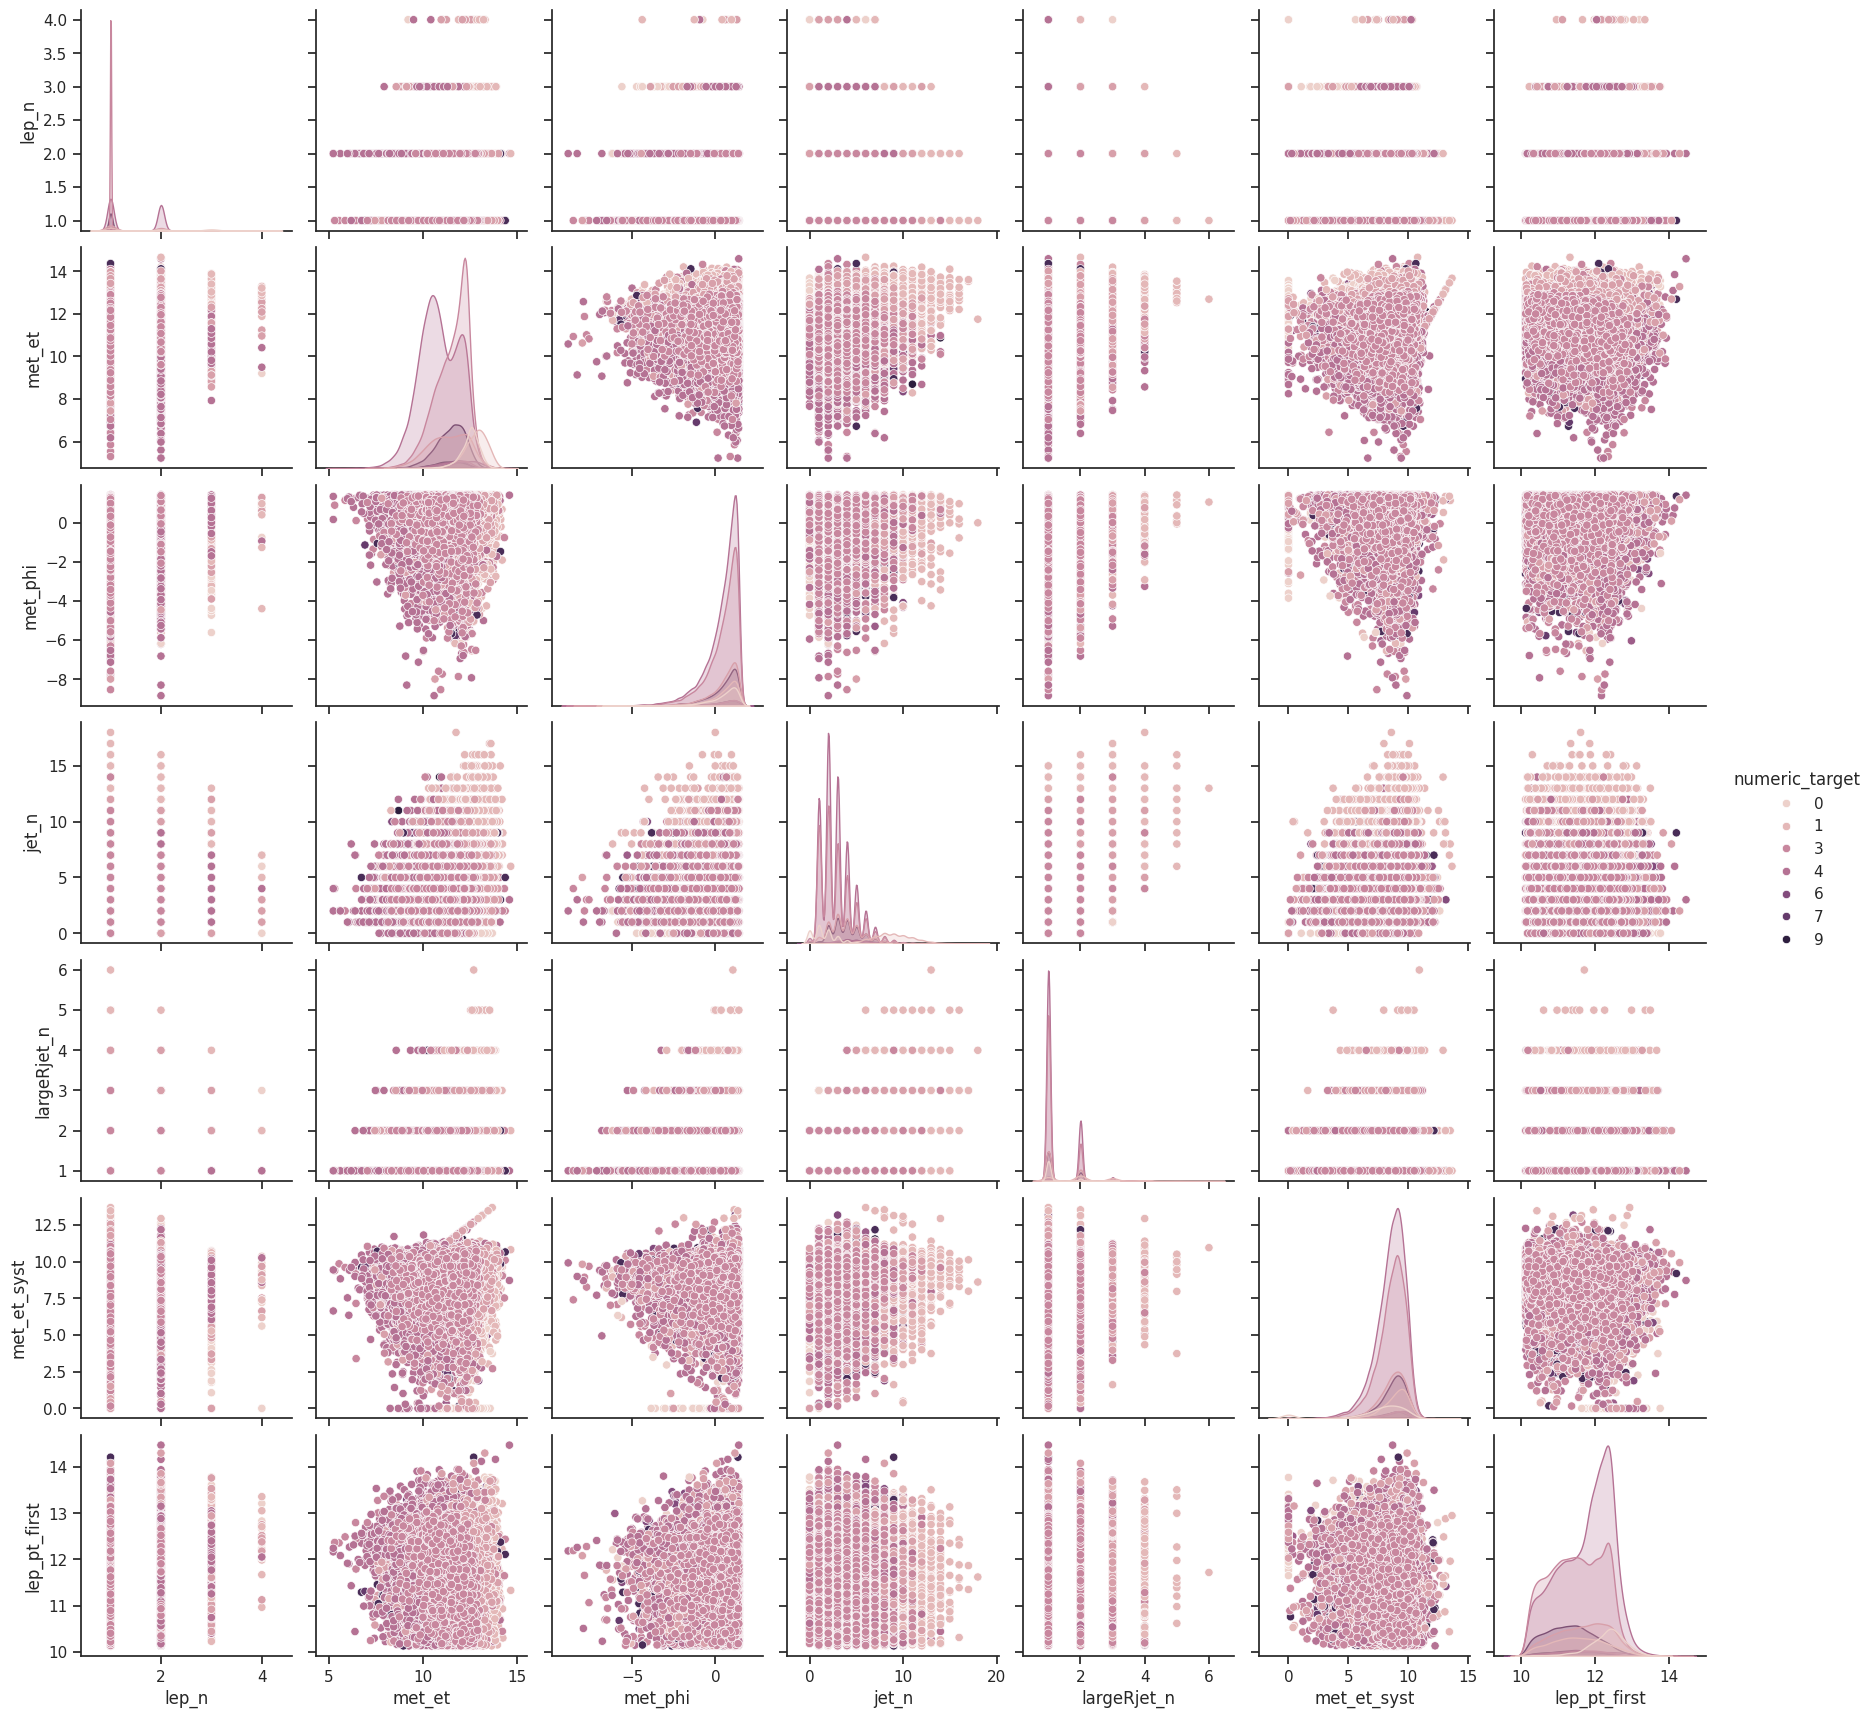

In [ ]:
import seaborn as sns
# Option 1: Create a combined DataFrame
combined_df = X.iloc[:, :7].copy()
combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

sns.set_theme(style="ticks")
sns.pairplot(combined_df,hue='numeric_target')
plt.show()

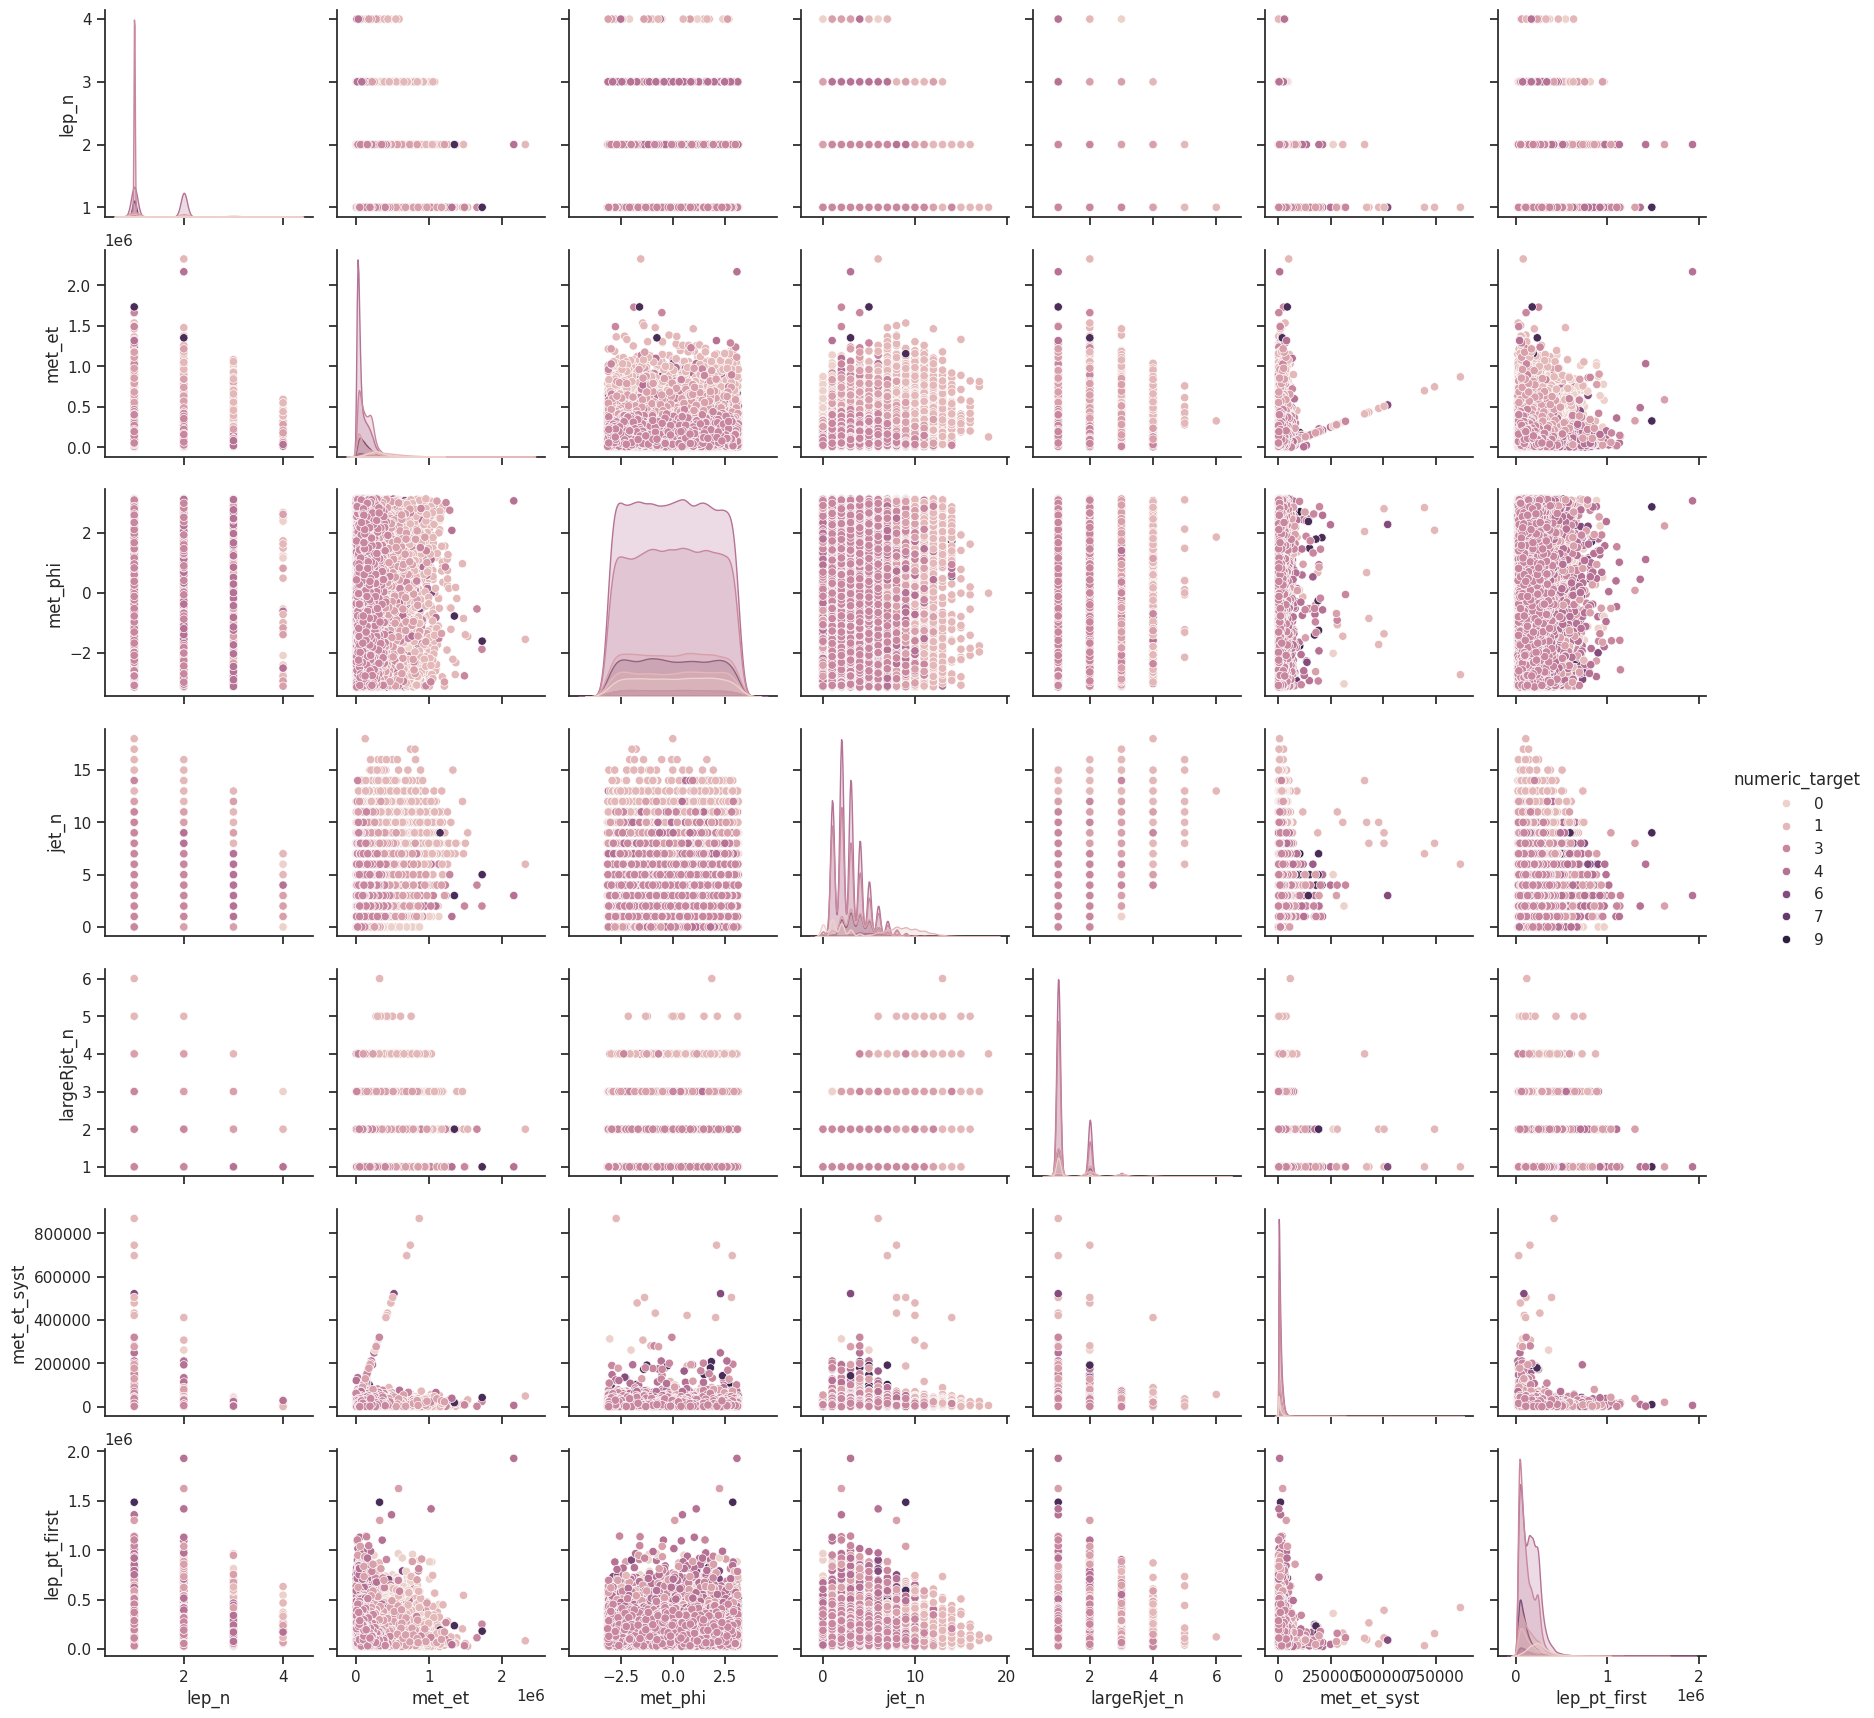

In [ ]:
combined_df = df_extracted.iloc[:, :7].copy()
combined_df['numeric_target'] = df['numeric_target'].values  # Use .values to avoid index mismatch

sns.set_theme(style="ticks")
sns.pairplot(combined_df,hue='numeric_target')
plt.show()

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 2000x2000 with 0 Axes>

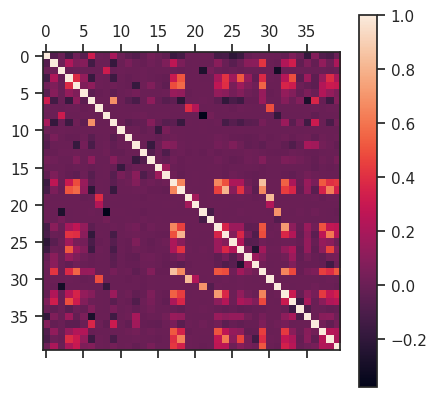

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20), dpi = 100)
plt.matshow(df_extracted.corr())
plt.colorbar()

In [ ]:
df_extracted.corr() < 0.1

trigE  trigM  lep_n  met_et  met_phi  jet_n  \
trigE                     False   True  False    True     True   True   
trigM                      True  False   True    True     True   True   
lep_n                     False   True  False    True     True   True   
met_et                     True   True   True   False     True  False   
met_phi                    True   True   True    True    False   True   
...                         ...    ...    ...     ...      ...    ...   
lep_pt_syst_second         True   True  False    True     True   True   
jet_pt_syst_first          True   True   True   False     True  False   
jet_pt_syst_second         True   True   True    True     True  False   
largeRjet_pt_syst_first    True   True   True   False     True  False   
largeRjet_pt_syst_second  False   True   True    True     True  False   

                          largeRjet_n  met_et_syst  lep_pt_first  \
trigE                           False         True         False   
trigM                            True         True          True   
lep_n                            True         True         False   
met_et                           True         True          True   
met_phi                          True         True          True   
...                               ...          ...           ...   
lep_pt_syst_second               True         True          True   
jet_pt_syst_first               False        False          True   
jet_pt_syst_second              False        False          True   
largeRjet_pt_syst_first         False         True          True   
largeRjet_pt_syst_second        False         True          True   

                          lep_pt_second  ...  largeRjet_D2_first  \
trigE                             False  ...                True   
trigM                              True  ...                True   
lep_n                             False  ...                True   
met_et                             True  ...                True   
met_phi                            True  ...                True   
...                                 ...  ...                 ...   
lep_pt_syst_second                False  ...                True   
jet_pt_syst_first                  True  ...                True   
jet_pt_syst_second                 True  ...                True   
largeRjet_pt_syst_first            True  ...                True   
largeRjet_pt_syst_second           True  ...                True   

                          largeRjet_D2_second  largeRjet_tau32_first  \
trigE                                    True                   True   
trigM                                    True                  False   
lep_n                                    True                   True   
met_et                                   True                   True   
met_phi                                  True                   True   
...                                       ...                    ...   
lep_pt_syst_second                       True                   True   
jet_pt_syst_first                        True                   True   
jet_pt_syst_second                       True                  False   
largeRjet_pt_syst_first                  True                   True   
largeRjet_pt_syst_second                False                   True   

                          largeRjet_tau32_second  lep_pt_syst_first  \
trigE                                       True               True   
trigM                                       True              False   
lep_n                                       True               True   
met_et                                      True               True   
met_phi                                     True               True   
...                                          ...                ...   
lep_pt_syst_second                          True              False   
jet_pt_syst_first                          False               True   
jet_pt_syst

In [ ]:
#feature importance after test train split to evalue with BDT

#training will be done on a small 20% samlpe of the data

###**Scaling And Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Split FIRST - Use numeric targets for stratification
X = df_extracted  # Your features
y_numeric = df['numeric_target']  # Use numeric targets for stratification
y_onehot = df['onehot_target']  # Keep one-hot for training

X_train, X_test, y_train_numeric, y_test_numeric, y_train_onehot, y_test_onehot = train_test_split(
    X, y_numeric, y_onehot, test_size=0.8, random_state=123, stratify=y_numeric
)


In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# 2. Scale AFTER splitting
#scaler = StandardScaler()



# # Try RobustScaler instead of StandardScaler
# scaler = RobustScaler()  # Less sensitive to outliers

# # Fit scaler only on training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform test data using training statistics
# X_test_scaled = scaler.transform(X_test)

#trying no scaling at all

X_train_scaled = X_train
X_test_scaled = X_test

y_train, y_test = y_train_onehot, y_test_onehot  # Use one-hot targets for training
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Target distribution: {np.bincount(y_train_numeric)}")


#fixing onehot target dimentions for NN

def convert_onehot_to_array(onehot_series):
    """Convert pandas series of one-hot vectors to numpy array"""
    return np.array([np.array(x) for x in onehot_series])


y_train_onehot = convert_onehot_to_array(y_train_onehot)
y_test_onehot = convert_onehot_to_array(y_test_onehot)


Training data shape: (16000, 40)
Test data shape: (64000, 40)
Target distribution: [ 600  800 1400 4800 6400  200  200  200 1200  200]


##**Feature Selection cont.**

[0]	validation_0-mlogloss:2.09254	validation_1-mlogloss:2.10321
[1]	validation_0-mlogloss:1.94287	validation_1-mlogloss:1.96240
[2]	validation_0-mlogloss:1.82176	validation_1-mlogloss:1.85005
[3]	validation_0-mlogloss:1.72170	validation_1-mlogloss:1.75755
[4]	validation_0-mlogloss:1.63637	validation_1-mlogloss:1.67936
[5]	validation_0-mlogloss:1.56163	validation_1-mlogloss:1.61120
[6]	validation_0-mlogloss:1.49616	validation_1-mlogloss:1.55200
[7]	validation_0-mlogloss:1.43684	validation_1-mlogloss:1.49902
[8]	validation_0-mlogloss:1.38395	validation_1-mlogloss:1.45224
[9]	validation_0-mlogloss:1.33713	validation_1-mlogloss:1.41145
[10]	validation_0-mlogloss:1.29171	validation_1-mlogloss:1.37220
[11]	validation_0-mlogloss:1.25215	validation_1-mlogloss:1.33799
[12]	validation_0-mlogloss:1.21660	validation_1-mlogloss:1.30775
[13]	validation_0-mlogloss:1.18343	validation_1-mlogloss:1.28019
[14]	validation_0-mlogloss:1.15290	validation_1-mlogloss:1.25474
[15]	validation_0-mlogloss:1.12393	

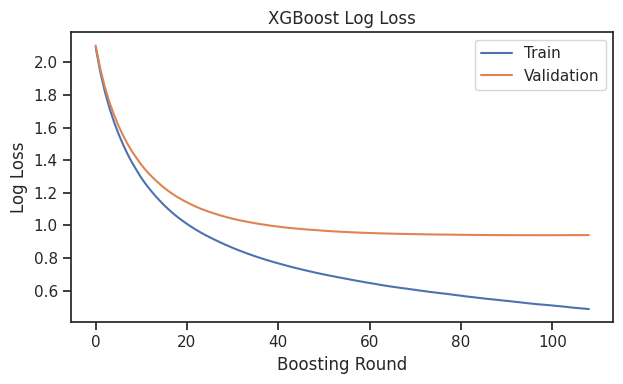

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    n_estimators=1000,           # Number of boosting rounds (like epochs)
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Learning rate (like optimizer step size)
    subsample=0.8,             # Fraction of samples used for training each tree
    colsample_bytree=0.8,      # Fraction of features used for each tree
    random_state=123,          # For reproducibility
    eval_metric='mlogloss',    # Multi-class log loss
    early_stopping_rounds=10,   # Stop if no improvement for 10 rounds
    verbosity=1
)

# Train the model (corrected parameters)
model.fit(
    X_train_scaled, y_train_numeric,
    eval_set=[(X_train_scaled, y_train_numeric), (X_test_scaled, y_test_numeric)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_numeric, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test_numeric, y_pred))

# Plot training history
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
plt.ylabel('Log Loss')
plt.xlabel('Boosting Round')
plt.title('XGBoost Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

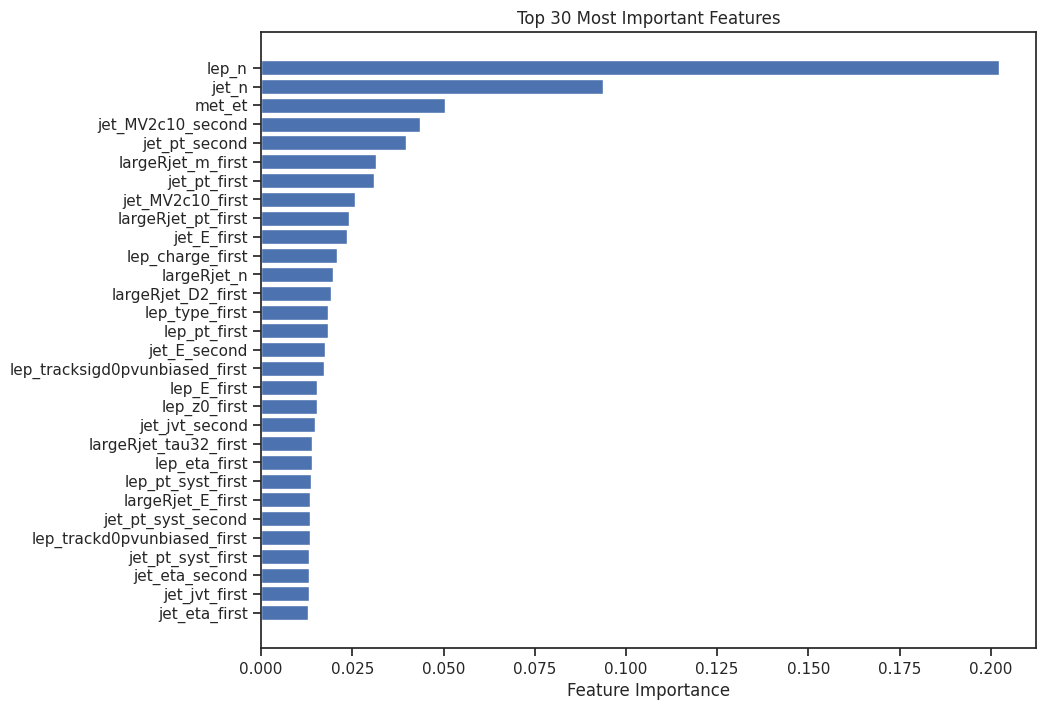

In [ ]:
# Get feature importance from your trained XGBoost model
importance = model.feature_importances_
feature_names = df_extracted.columns

# Create importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 8))
top_features = importance_df.head(30)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 30 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

# Select top N features
top_n = 10  # adjust based on your needs
selected_features = importance_df.head(top_n)['feature'].tolist()

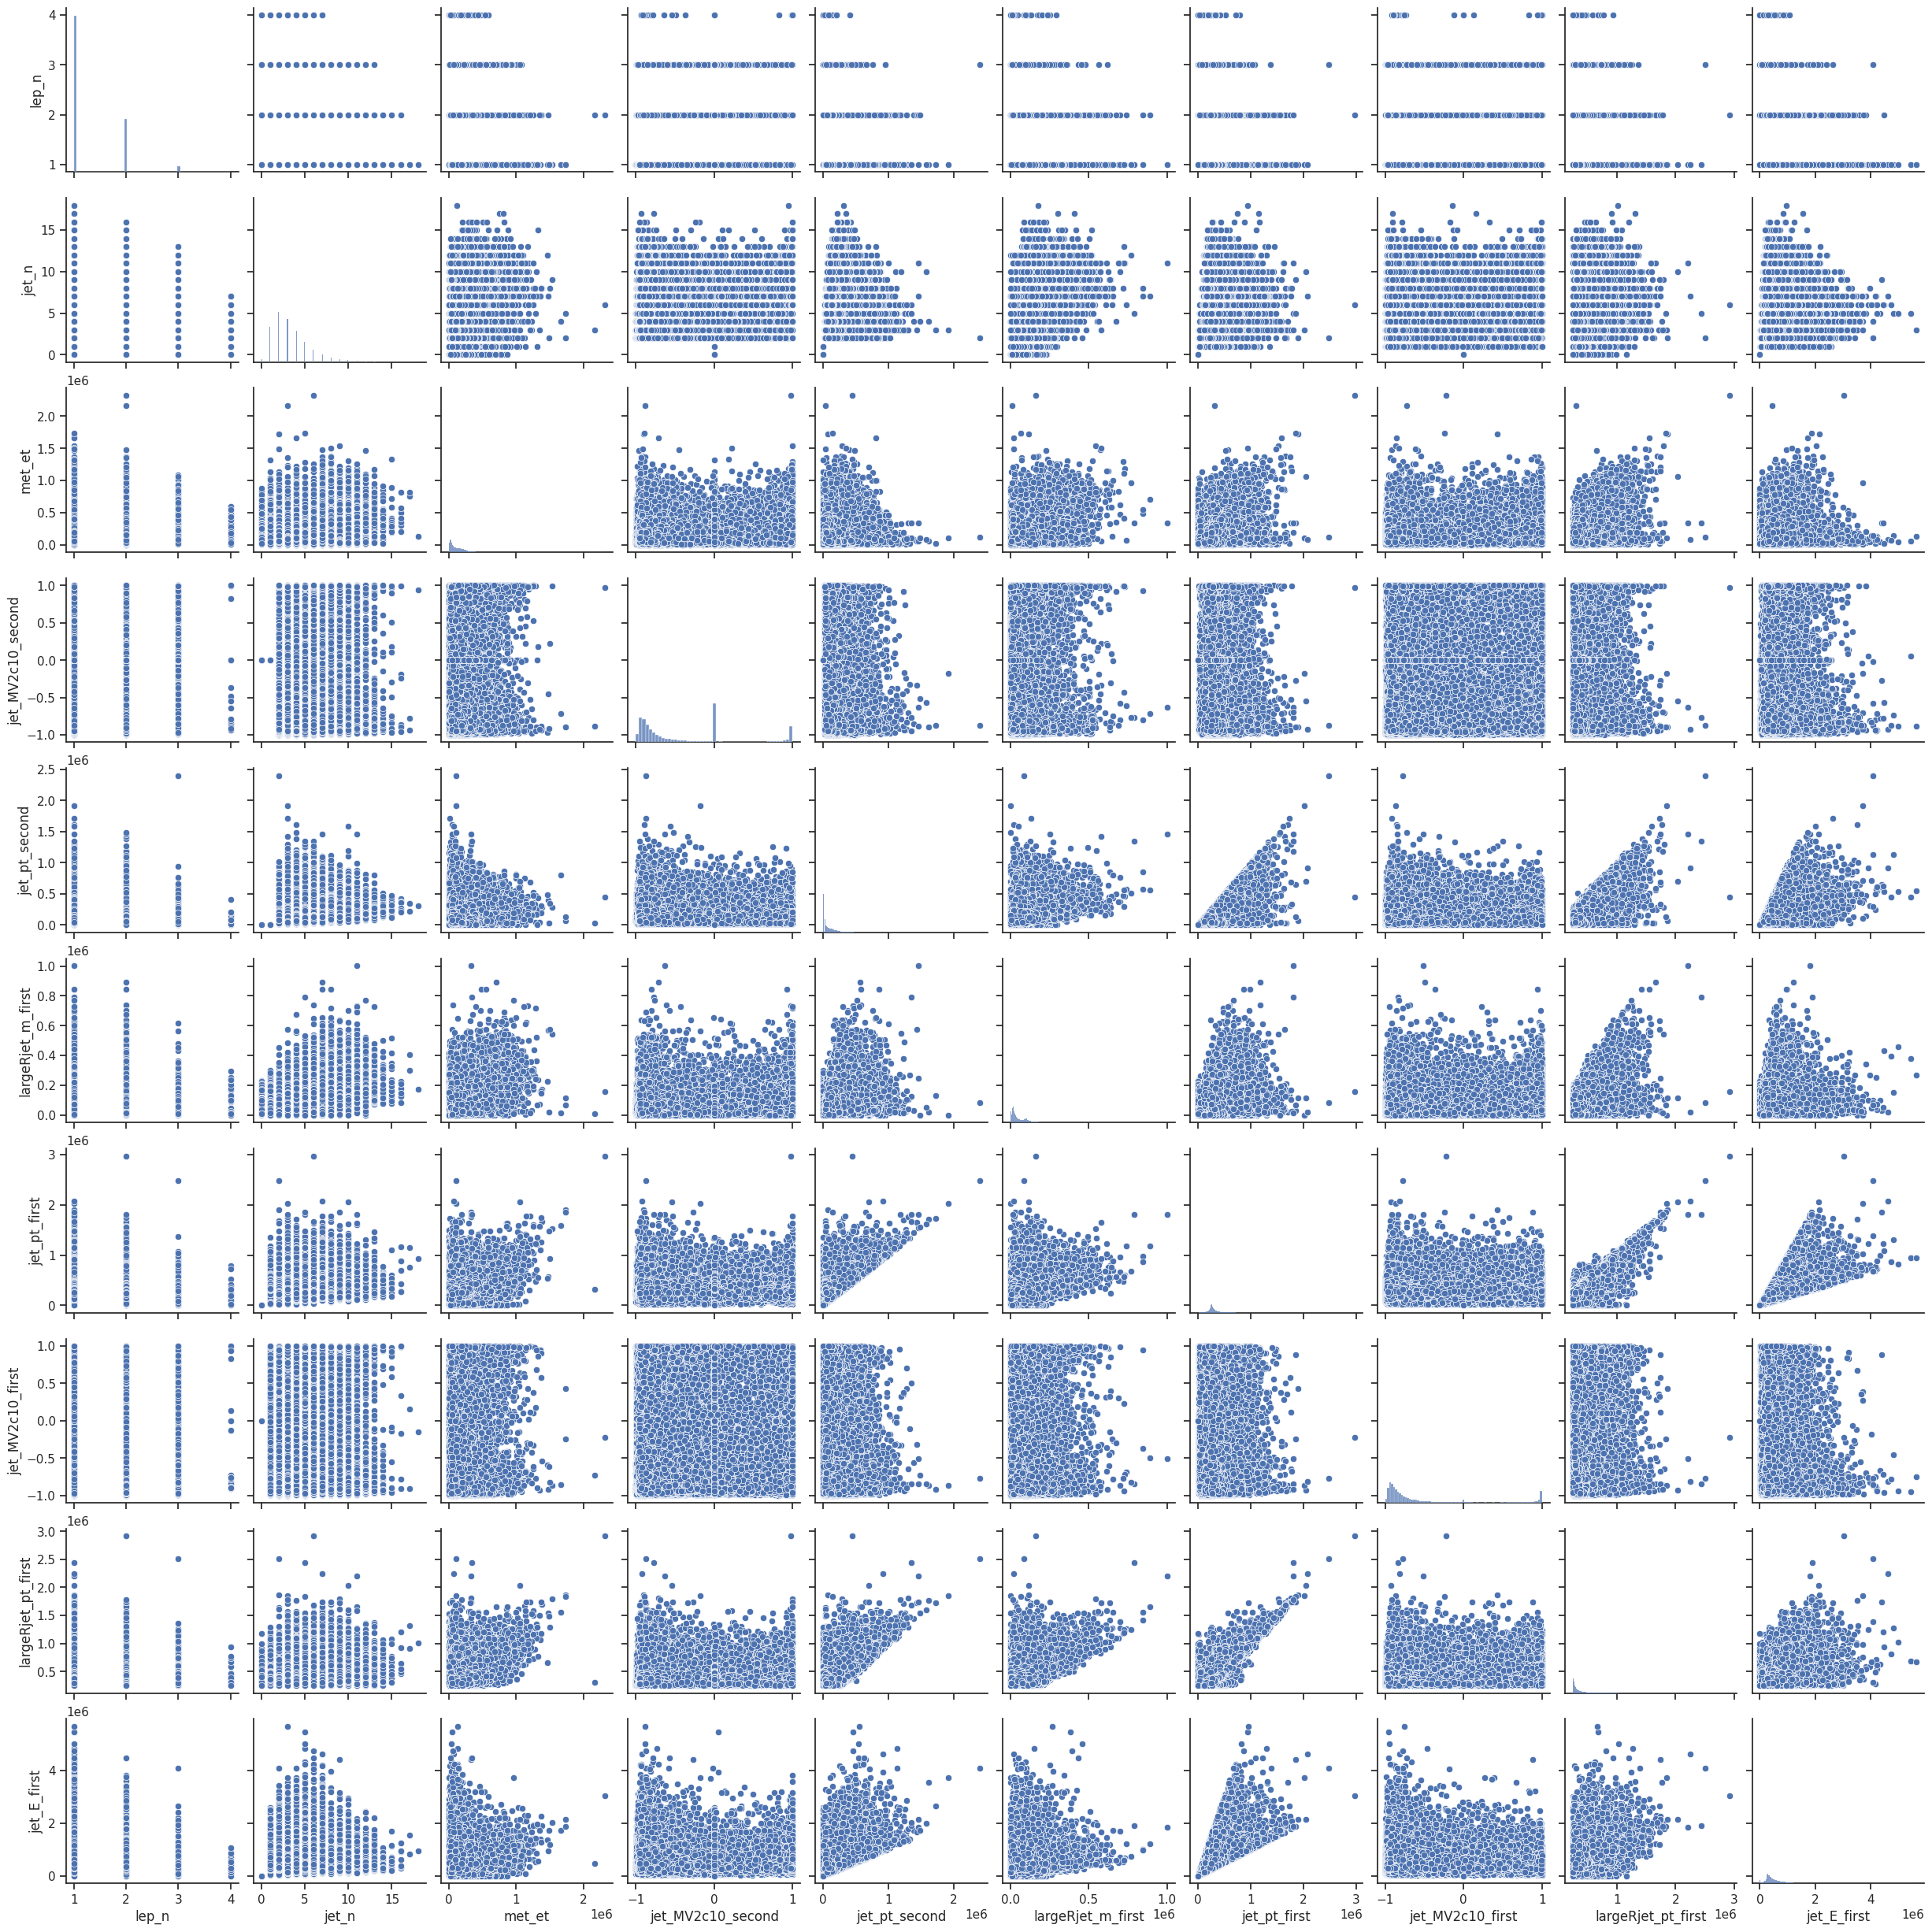

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_extracted[selected_features])

## **Test Train Split again**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Split FIRST - Use numeric targets for stratification
X = df_extracted[selected_features]  # Your features
y_numeric = df['numeric_target']  # Use numeric targets for stratification
y_onehot = df['onehot_target']  # Keep one-hot for training

X_train, X_test, y_train_numeric, y_test_numeric, y_train_onehot, y_test_onehot = train_test_split(
    X, y_numeric, y_onehot, test_size=0.2, random_state=123, stratify=y_numeric
)

# 2. Scale AFTER splitting
scaler = StandardScaler()

# Fit scaler only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using training statistics
X_test_scaled = scaler.transform(X_test)


y_train, y_test = y_train_onehot, y_test_onehot  # Use one-hot targets for training
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Target distribution: {np.bincount(y_train_numeric)}")


#fixing onehot target dimentions for NN

def convert_onehot_to_array(onehot_series):
    """Convert pandas series of one-hot vectors to numpy array"""
    return np.array([np.array(x) for x in onehot_series])


y_train_onehot = convert_onehot_to_array(y_train_onehot)
y_test_onehot = convert_onehot_to_array(y_test_onehot)


Training data shape: (64000, 20)
Test data shape: (16000, 20)
Target distribution: [ 2400  3200  5600 19200 25600   800   800   800  4800   800]


##**Model 1: simple NN**

In [ ]:
# 3. Train your neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Fix: Use numeric targets for sparse_categorical_crossentropy
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Use Input layer instead of input_shape
    Dense(125, activation='relu'),
    Dense(len(np.unique(y_train_numeric)), activation='softmax')  # Use y_train_numeric
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 125)            │         8,125 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,385 (36.66 KB)

 Trainable params: 9,385 (36.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_onehot,
                   validation_data=(X_test_scaled, y_test_onehot),
                   epochs=3, #increase later
                   batch_size=32,
                   verbose=1)

Epoch 1/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5413 - loss: 1.1965 - val_accuracy: 0.6020 - val_loss: 0.9698
Epoch 2/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6139 - loss: 0.9602 - val_accuracy: 0.6109 - val_loss: 0.9526
Epoch 3/3
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6222 - loss: 0.9385 - val_accuracy: 0.6119 - val_loss: 0.9448


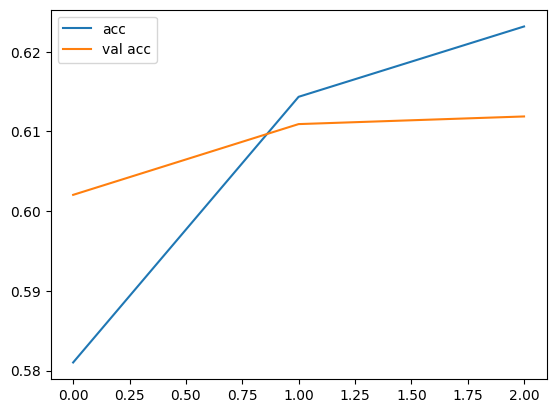

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

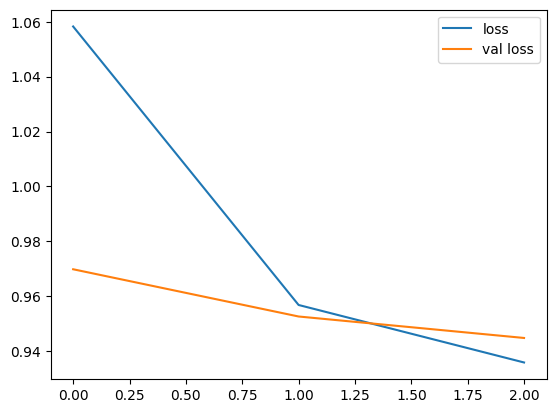

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


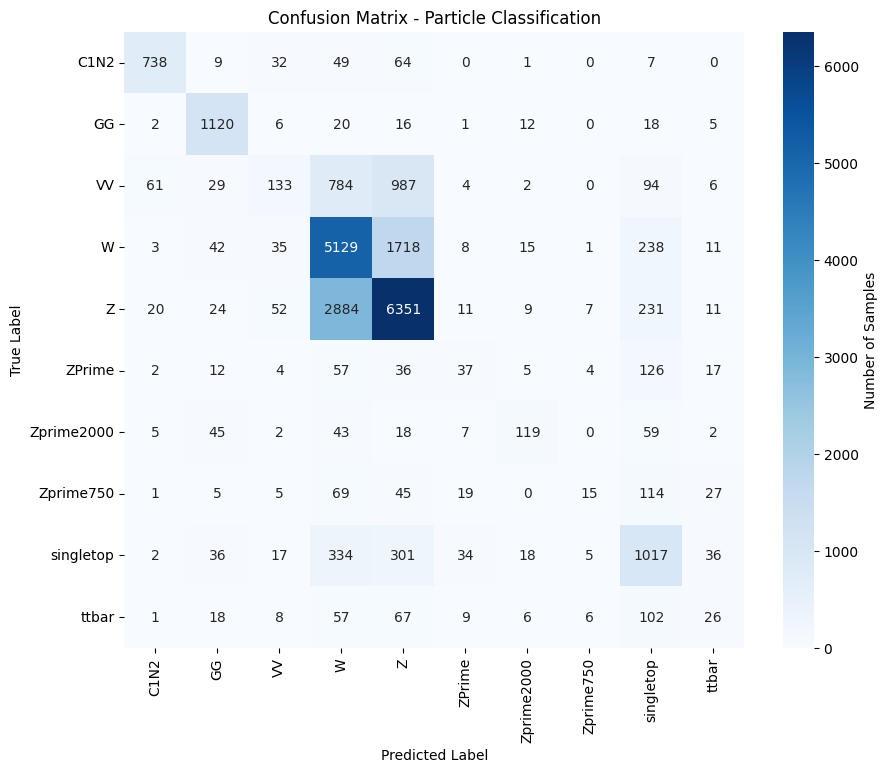

Classification Report:
              precision    recall  f1-score   support

        C1N2       0.88      0.82      0.85       900
          GG       0.84      0.93      0.88      1200
          VV       0.45      0.06      0.11      2100
           W       0.54      0.71      0.62      7200
           Z       0.66      0.66      0.66      9600
      ZPrime       0.28      0.12      0.17       300
  Zprime2000       0.64      0.40      0.49       300
   Zprime750       0.39      0.05      0.09       300
   singletop       0.51      0.56      0.53      1800
       ttbar       0.18      0.09      0.12       300

    accuracy                           0.61     24000
   macro avg       0.54      0.44      0.45     24000
weighted avg       0.60      0.61      0.59     24000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions (probabilities)
y_pred_proba = model.predict(X_test_scaled)

# Convert predictions to class labels (argmax)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Convert one-hot test targets to class labels
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Create confusion matrix with class labels
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Get particle names
particle_names = np.unique(df.event_type)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=particle_names))

##**Model 2: BDT**

[0]	validation_0-mlogloss:2.09749	validation_1-mlogloss:2.10127
[1]	validation_0-mlogloss:1.94274	validation_1-mlogloss:1.95007
[2]	validation_0-mlogloss:1.82335	validation_1-mlogloss:1.83378
[3]	validation_0-mlogloss:1.72204	validation_1-mlogloss:1.73531
[4]	validation_0-mlogloss:1.63749	validation_1-mlogloss:1.65348
[5]	validation_0-mlogloss:1.56489	validation_1-mlogloss:1.58331
[6]	validation_0-mlogloss:1.50019	validation_1-mlogloss:1.52117
[7]	validation_0-mlogloss:1.44254	validation_1-mlogloss:1.46610
[8]	validation_0-mlogloss:1.39246	validation_1-mlogloss:1.41844
[9]	validation_0-mlogloss:1.34653	validation_1-mlogloss:1.37483
[10]	validation_0-mlogloss:1.30532	validation_1-mlogloss:1.33572
[11]	validation_0-mlogloss:1.26782	validation_1-mlogloss:1.30050
[12]	validation_0-mlogloss:1.23437	validation_1-mlogloss:1.26935
[13]	validation_0-mlogloss:1.20315	validation_1-mlogloss:1.24032
[14]	validation_0-mlogloss:1.17501	validation_1-mlogloss:1.21468
[15]	validation_0-mlogloss:1.14934	

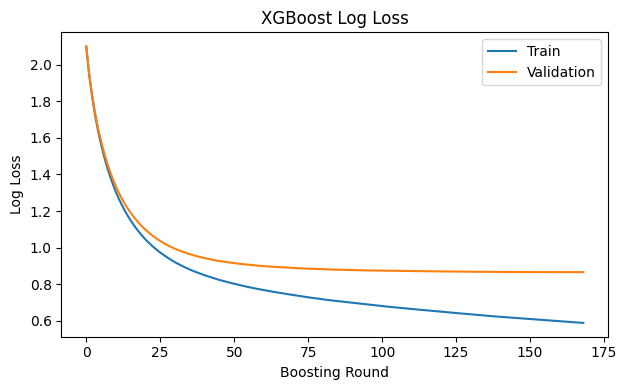

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Create XGBoost classifier
model = xgb.XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    n_estimators=1000,           # Number of boosting rounds (like epochs)
    max_depth=6,               # Maximum tree depth
    learning_rate=0.1,         # Learning rate (like optimizer step size)
    subsample=0.8,             # Fraction of samples used for training each tree
    colsample_bytree=0.8,      # Fraction of features used for each tree
    random_state=123,          # For reproducibility
    eval_metric='mlogloss',    # Multi-class log loss
    early_stopping_rounds=10,   # Stop if no improvement for 10 rounds
    verbosity=1
)

# Train the model (corrected parameters)
model.fit(
    X_train_scaled, y_train_numeric,
    eval_set=[(X_train_scaled, y_train_numeric), (X_test_scaled, y_test_numeric)],
    verbose=True
)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_numeric, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test_numeric, y_pred))

# Plot training history
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
plt.ylabel('Log Loss')
plt.xlabel('Boosting Round')
plt.title('XGBoost Log Loss')
plt.legend()

plt.tight_layout()
plt.show()

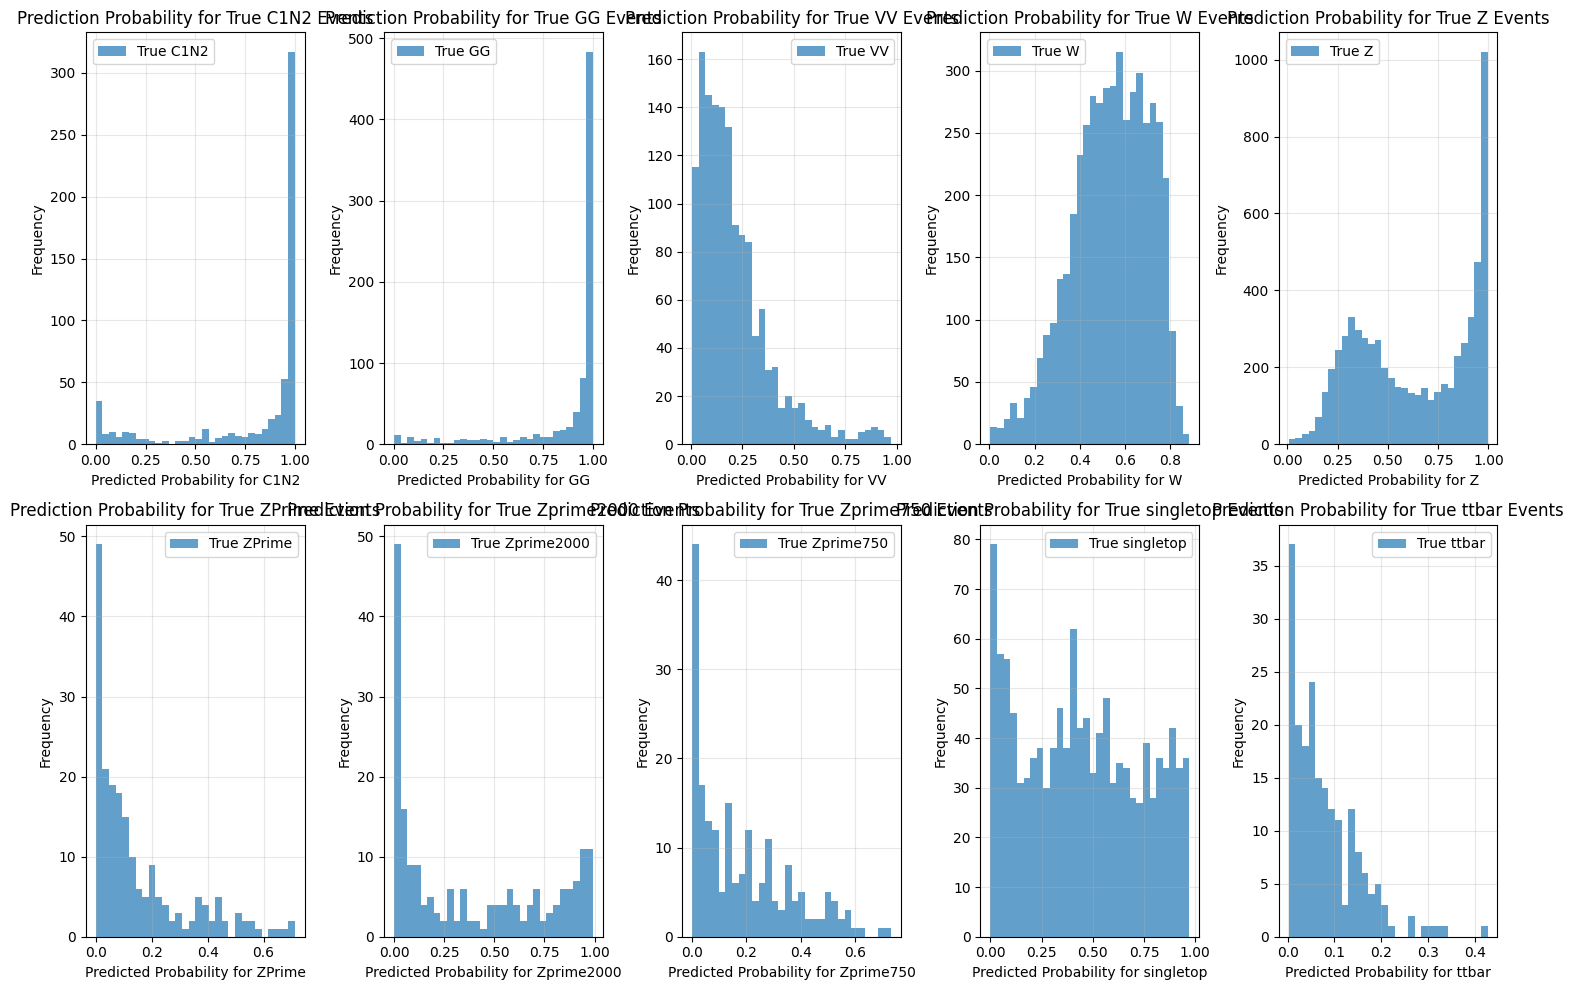

In [ ]:

# Get predictions
y_pred_proba = model.predict_proba(X_test_scaled)

# Create a DataFrame for easier handling
pred_df = pd.DataFrame({
    'true_label': y_test_numeric,
    'predicted_class': np.argmax(y_pred_proba, axis=1)
})

# Add probability columns for each class
for i in range(y_pred_proba.shape[1]):
    pred_df[f'prob_class_{i}'] = y_pred_proba[:, i]

# Get unique particle types (assuming you have this mapping)
particle_names = np.unique(df.event_type)

# Plot probability histograms for each true event type
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.flatten()

for true_class in range(len(particle_names)):
    # Get data for this true class
    mask = pred_df['true_label'] == true_class
    class_data = pred_df[mask]

    if len(class_data) == 0:
        continue

    ax = axes[true_class]

    # Plot histogram of predicted probabilities for the correct class
    correct_probs = class_data[f'prob_class_{true_class}']
    ax.hist(correct_probs, bins=30, alpha=0.7, label=f'True {particle_names[true_class]}')

    ax.set_xlabel(f'Predicted Probability for {particle_names[true_class]}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Prediction Probability for True {particle_names[true_class]} Events')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

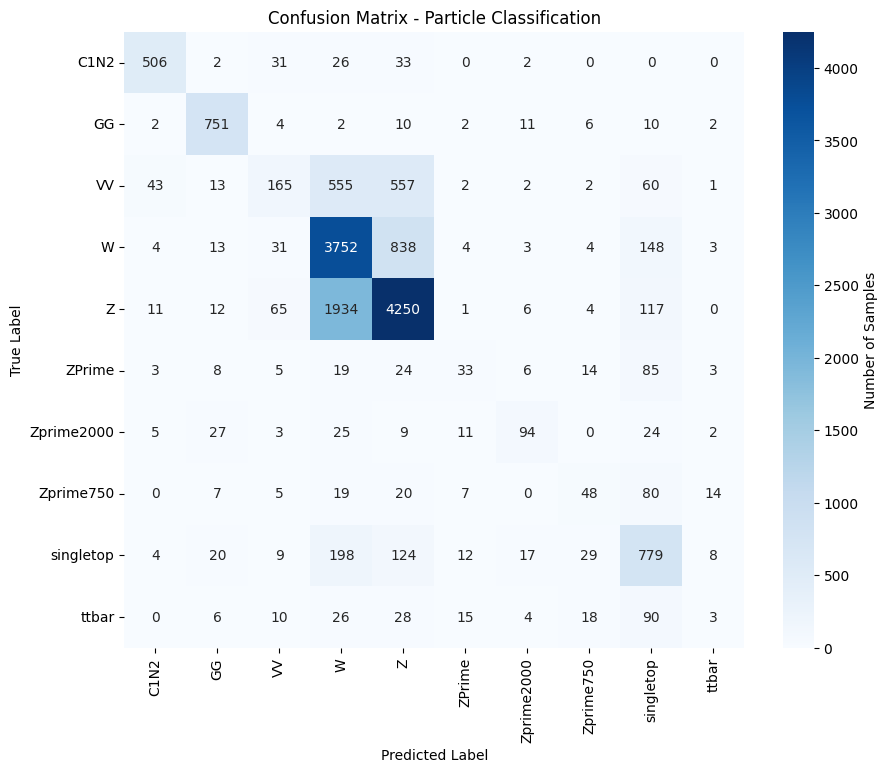

Classification Report:
              precision    recall  f1-score   support

        C1N2       0.88      0.84      0.86       600
          GG       0.87      0.94      0.91       800
          VV       0.50      0.12      0.19      1400
           W       0.57      0.78      0.66      4800
           Z       0.72      0.66      0.69      6400
      ZPrime       0.38      0.17      0.23       200
  Zprime2000       0.65      0.47      0.54       200
   Zprime750       0.38      0.24      0.30       200
   singletop       0.56      0.65      0.60      1200
       ttbar       0.08      0.01      0.03       200

    accuracy                           0.65     16000
   macro avg       0.56      0.49      0.50     16000
weighted avg       0.64      0.65      0.63     16000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions
y_pred = model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test_numeric, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_numeric, y_pred, target_names=particle_names))

##**Model 3: more complex NN**

In [ ]:
############### attempt at a better NN


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LeakyReLU

# Create improved model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),

    # First hidden layer
    Dense(512, activation=LeakyReLU(alpha=0.1)),
    BatchNormalization(),
    Dropout(0.4),

    # Second hidden layer
    Dense(256, activation=LeakyReLU(alpha=0.1)),
    BatchNormalization(),
    Dropout(0.3),

    # Third hidden layer
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth hidden layer
    Dense(64, activation=LeakyReLU(alpha=0.1)),
    Dropout(0.2),

    # Output layer
    Dense(len(np.unique(y_train_numeric)), activation='softmax')
])

# Compile with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Calculate class weights for imbalanced data
class_weights = compute_class_weight('balanced',
                                   classes=np.unique(y_train_numeric),
                                   y=y_train_numeric)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

# Setup callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.1)

# Train for much longer
history = model.fit(X_train_scaled, y_train_onehot,
                   validation_data=(X_test_scaled, y_test_onehot),
                   epochs=300,  # Much more training
                   batch_size=64,  # Try different batch size
                   class_weight=class_weight_dict,
                   callbacks=[early_stopping, reduce_lr],
                   verbose=1)

model.summary()

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3514 - loss: 1.7827 - val_accuracy: 0.4681 - val_loss: 1.4720 - learning_rate: 0.0050
Epoch 2/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4292 - loss: 1.5020 - val_accuracy: 0.4854 - val_loss: 1.3405 - learning_rate: 0.0050
Epoch 3/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4389 - loss: 1.4441 - val_accuracy: 0.4651 - val_loss: 1.4242 - learning_rate: 0.0050
Epoch 4/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4435 - loss: 1.4311 - val_accuracy: 0.4601 - val_loss: 1.4361 - learning_rate: 0.0050
Epoch 5/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4524 - loss: 1.3878 - val_accuracy: 0.4856 - val_loss: 1.3623 - learning_rate: 0.0050
Epoch 6/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4464 - loss: 1.4095 - val_accuracy: 0.4642 - val_loss: 1.3977 - learning_rate: 0.0050
Epoch 7/300
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4498 - loss:

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 558,816 (2.13 MB)

 Trainable params: 185,674 (725.29 KB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 371,350 (1.42 MB)

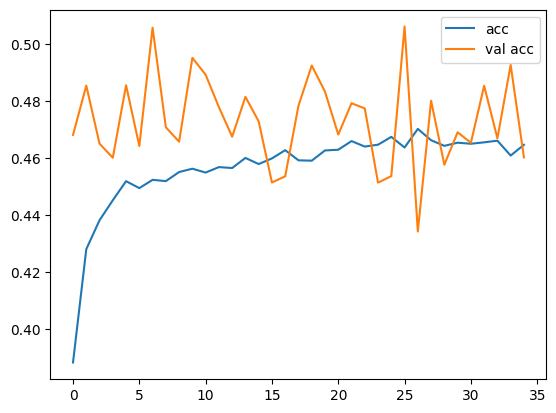

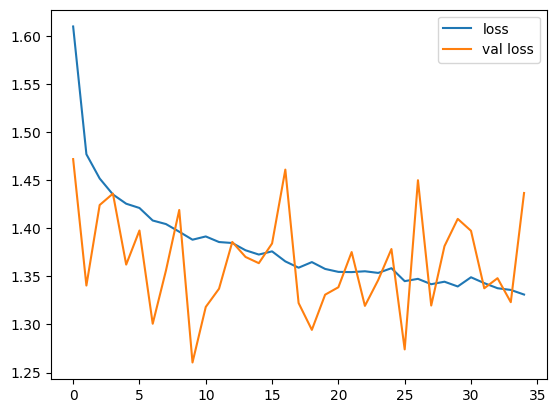

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


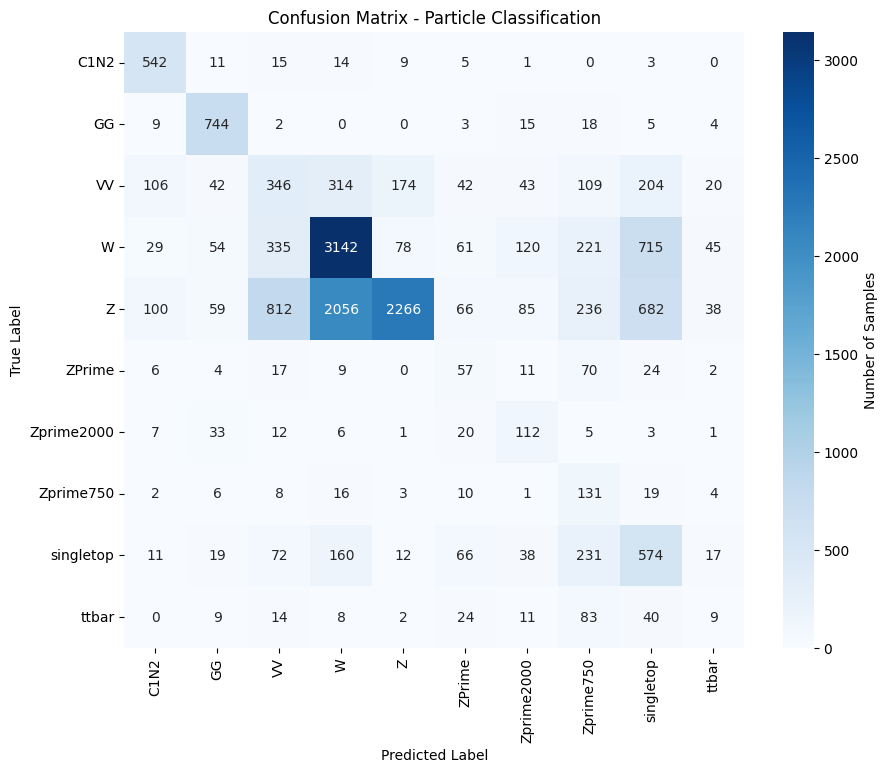

Classification Report:
              precision    recall  f1-score   support

        C1N2       0.67      0.90      0.77       600
          GG       0.76      0.93      0.84       800
          VV       0.21      0.25      0.23      1400
           W       0.55      0.65      0.60      4800
           Z       0.89      0.35      0.51      6400
      ZPrime       0.16      0.28      0.21       200
  Zprime2000       0.26      0.56      0.35       200
   Zprime750       0.12      0.66      0.20       200
   singletop       0.25      0.48      0.33      1200
       ttbar       0.06      0.04      0.05       200

    accuracy                           0.50     16000
   macro avg       0.39      0.51      0.41     16000
weighted avg       0.63      0.50      0.51     16000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions (probabilities)
y_pred_proba = model.predict(X_test_scaled)

# Convert predictions to class labels (argmax)
y_pred_classes = np.argmax(y_pred_proba, axis=1)

# Convert one-hot test targets to class labels
y_test_classes = np.argmax(y_test_onehot, axis=1)

# Create confusion matrix with class labels
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Get particle names
particle_names = np.unique(df.event_type)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=particle_names, yticklabels=particle_names,
            cbar_kws={'label': 'Number of Samples'})
plt.title('Confusion Matrix - Particle Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=particle_names))